<a href="https://colab.research.google.com/github/Sinamhd9/Computer-vision-projects/blob/main/Image%20segmentation%20with%20k-means/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means

First, kmeans algorithm is implemented from scratch. Then we use it to do image segmentation. 

In [20]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import cv2
from google.colab.patches import cv2_imshow


In [14]:
'''
Kmeans function which takes arguments of data, number of clusters (k),
maximum iterations and number of different initializations (r)
It returns the best (in terms of L2 distance) cluster idxs, centriods and distances of each data point to 
the centriods, and the minimum sum of square errors through different n_inits
'''

def kmeans(data, k, max_iter=100, r = 10):
  m, n = data.shape
  all_dists = []
  all_clusters = []
  all_centers = []
  errors = []
  for init in range(r):
    idx = np.random.randint(m, size = k)
    clusters= np.zeros((m,))
    distances = np.zeros((m, k))
    centers = data[idx, :]
    diff = 1
    iter = 0
    while (diff!=0 and iter<max_iter):
      distances= cdist(data, centers)
      diff = np.sum(np.argmin(distances, axis=1) - clusters)
      clusters = np.argmin(distances, axis=1)
      for i in range(k):
        centers[i] = data[clusters==i].mean(axis=0)
      iter+=1

    errors.append(np.sum(np.square(np.min(distances, axis=1))))
    all_dists.append(distances)
    all_clusters.append(clusters)
    all_centers.append(centers)

  best_cluster = all_clusters[np.argmin(errors)]
  best_center = all_centers[np.argmin(errors)]
  best_distance = all_dists[np.argmin(errors)]
  return best_cluster, best_center, best_distance, np.min(errors) 

## Results 

The results are shown for the input text dataset with different k values. 

### K = 2

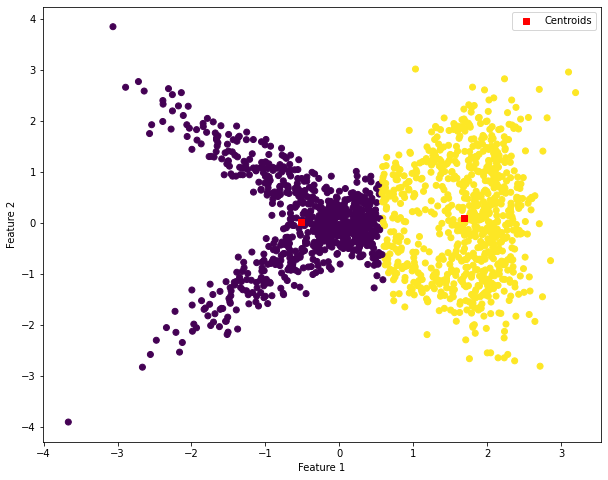

The minimum sum of square errors is 2228.619218804037


In [15]:
data = np.loadtxt('510_cluster_dataset.txt')
idx, c, d, er = kmeans(data, k=2, max_iter=300, r = 10)

plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=idx)
plt.scatter(c[:,0], c[:,1],marker='s', c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print('The minimum sum of square errors is', er)

### K = 3

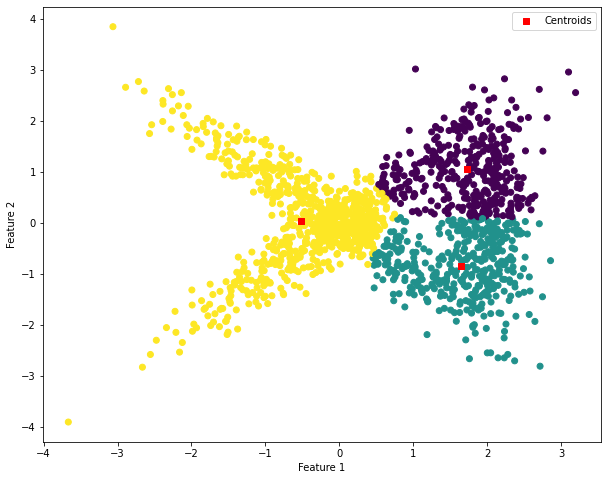

The minimum sum of square errors is 1539.2566749916352


In [16]:
idx, c, d, er = kmeans(data, k=3, max_iter=300, r = 10)

plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=idx)
plt.scatter(c[:,0], c[:,1],marker='s', c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print('The minimum sum of square errors is', er)

### k=4

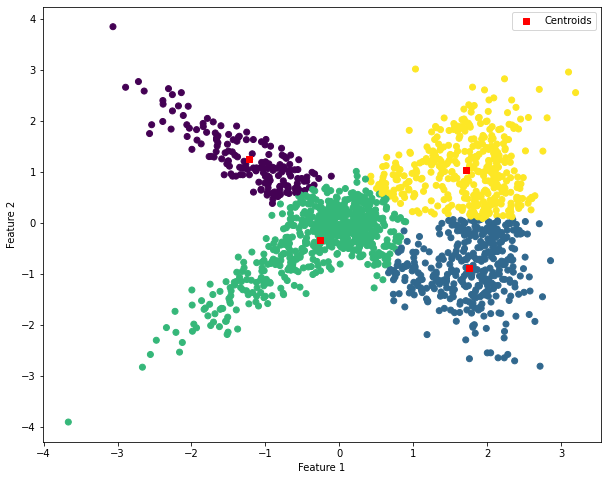

The minimum sum of square errors is 1103.5070477213324


In [17]:
idx, c, d, er = kmeans(data, k=4, max_iter=300, r = 100)

plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=idx)
plt.scatter(c[:,0], c[:,1],marker='s', c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print('The minimum sum of square errors is', er)

### Visualization of each iteration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


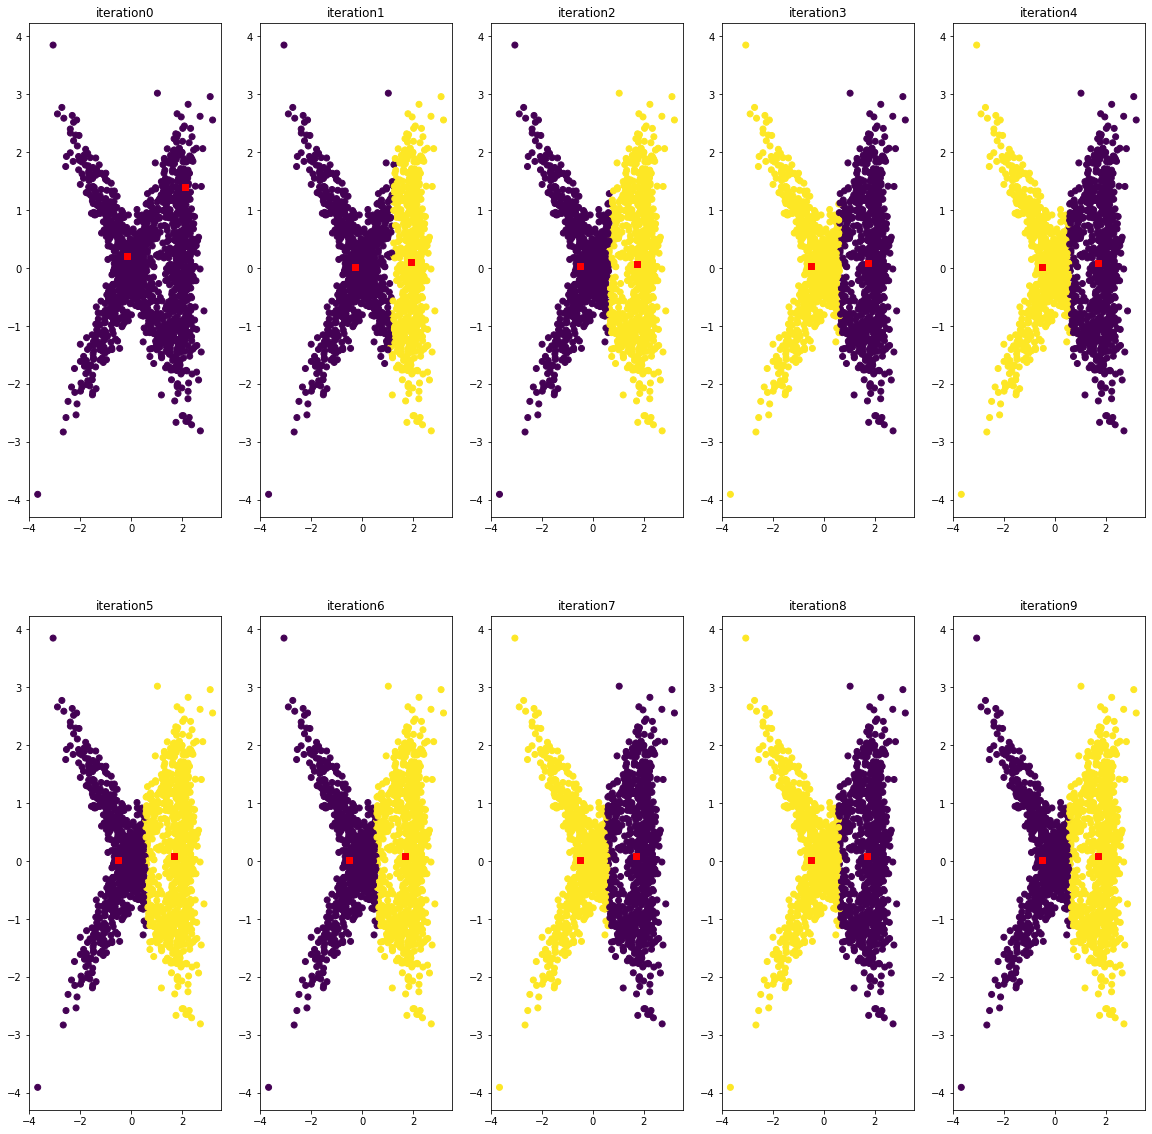

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(20, 20))
axs = axs.ravel()
fig.subplots_adjust(hspace = .2, wspace=.2)
z=0
for i in range(10):
  idx, c, d, er = kmeans(data, k=2, max_iter=i, r = 10)
  axs[z].scatter(data[:,0], data[:,1], c=idx)
  axs[z].scatter(c[:,0], c[:,1],marker='s', c='r', label='Centroids')
  axs[z].set_title( 'iteration{}'.format(i))
  z+=1
plt.show()

We can see it converges very fast

# Image segmentation


## Image 1 

**Please note in all images left is before and right is after segmentation.**


### K = 5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


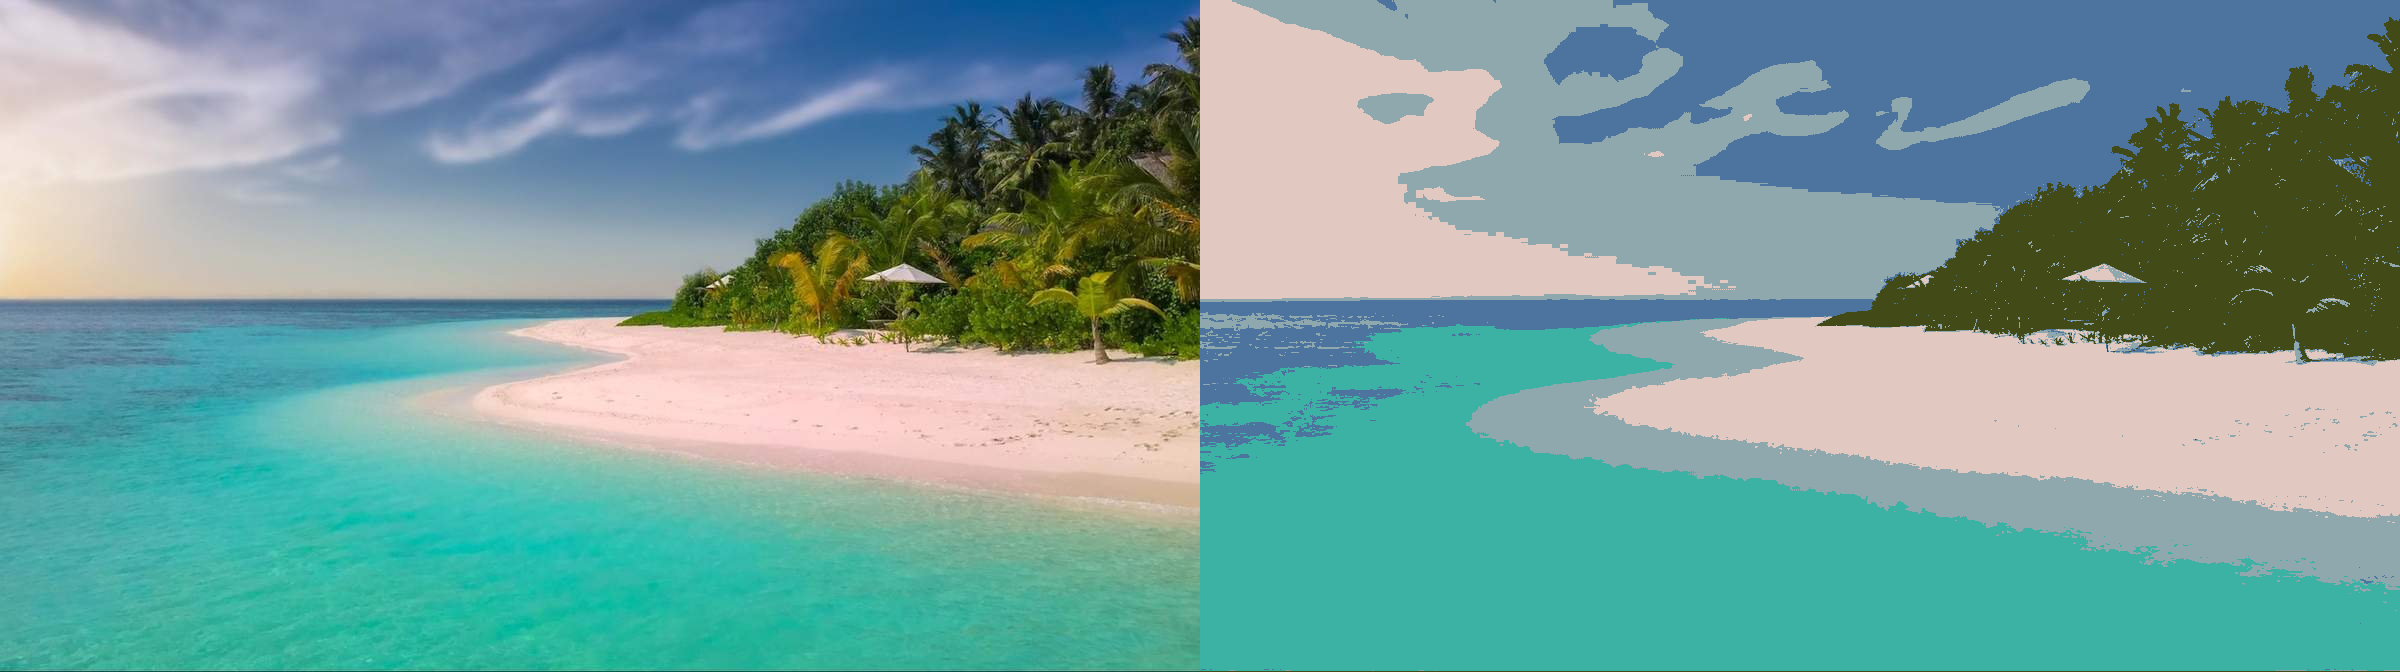

In [21]:
img1 = cv2.imread('Kmean_img1.jpg')
img2 = cv2.imread('Kmean_img2.jpg') 

idx1_k5, c1_k5, d1_k5,_ = kmeans(img1.reshape(-1,3), k= 5, max_iter=50, r = 10)
img1_seg_k5 = (c1_k5[idx1_k5]).reshape(img1.shape)
res_img1_k5 = np.concatenate((img1, img1_seg_k5), axis=1)
cv2_imshow(res_img1_k5)

### K = 10

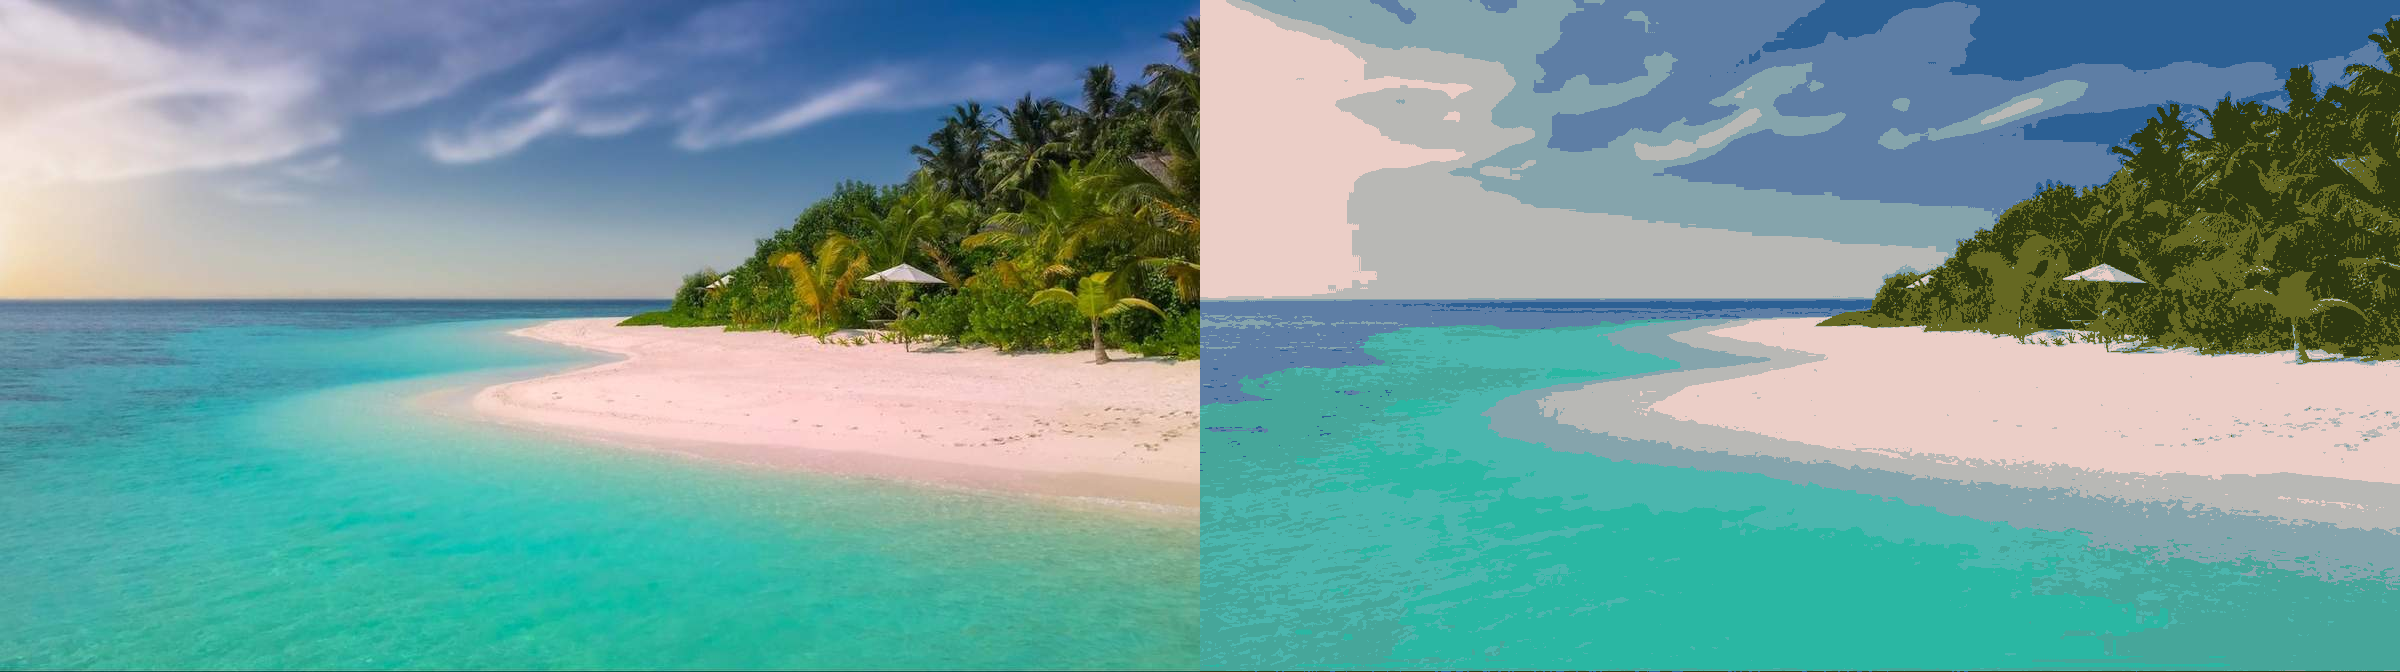

In [22]:
idx1_k10, c1_k10, d1_k10,_ = kmeans(img1.reshape(-1,3), k= 10, max_iter=100, r = 10)
img1_seg_k10 = c1_k10[idx1_k10].reshape(img1.shape)
res_img1_k10 = np.concatenate((img1, img1_seg_k10), axis=1)
cv2_imshow(res_img1_k10)

##Image 2



### K = 5

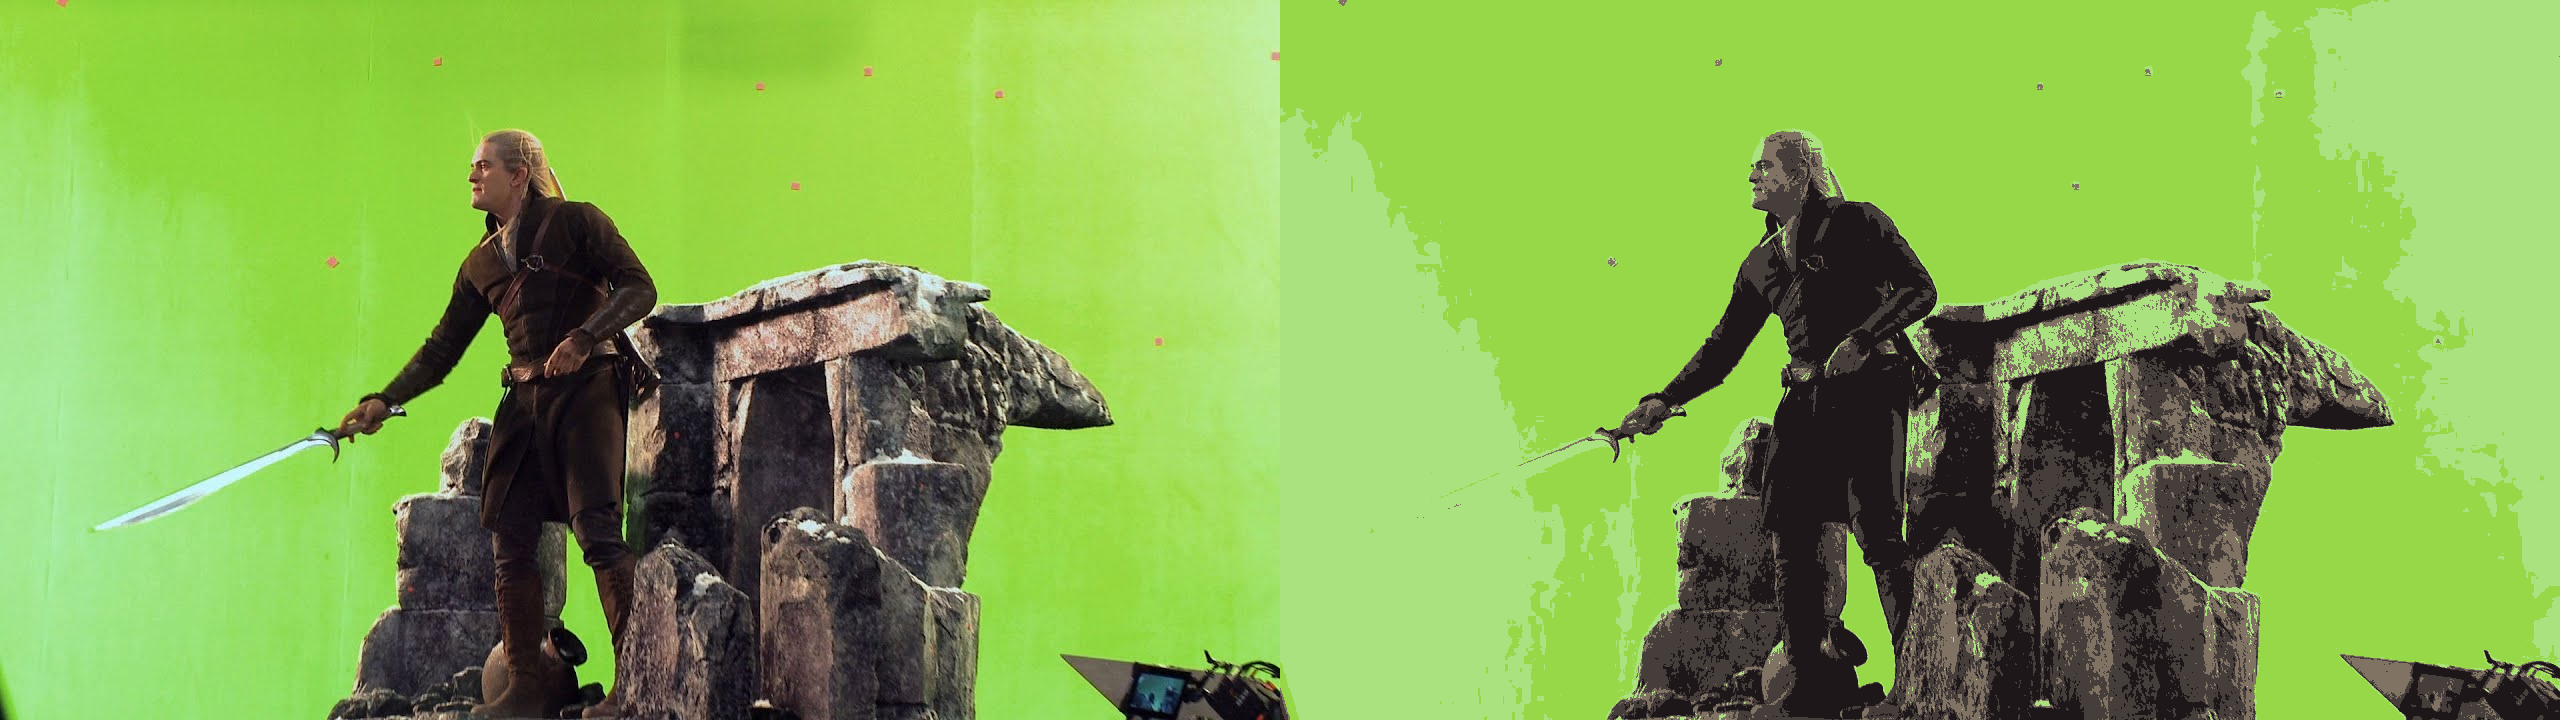

In [23]:
idx2_k5, c2_k5, d2_k5,_ = kmeans(img2.reshape(-1,3), k= 5, max_iter=50, r = 10)
img2_seg_k5 = (c2_k5[idx2_k5]).reshape(img2.shape)
res_img2_k5 = np.concatenate((img2, img2_seg_k5), axis=1)
cv2_imshow(res_img2_k5)


### K = 10

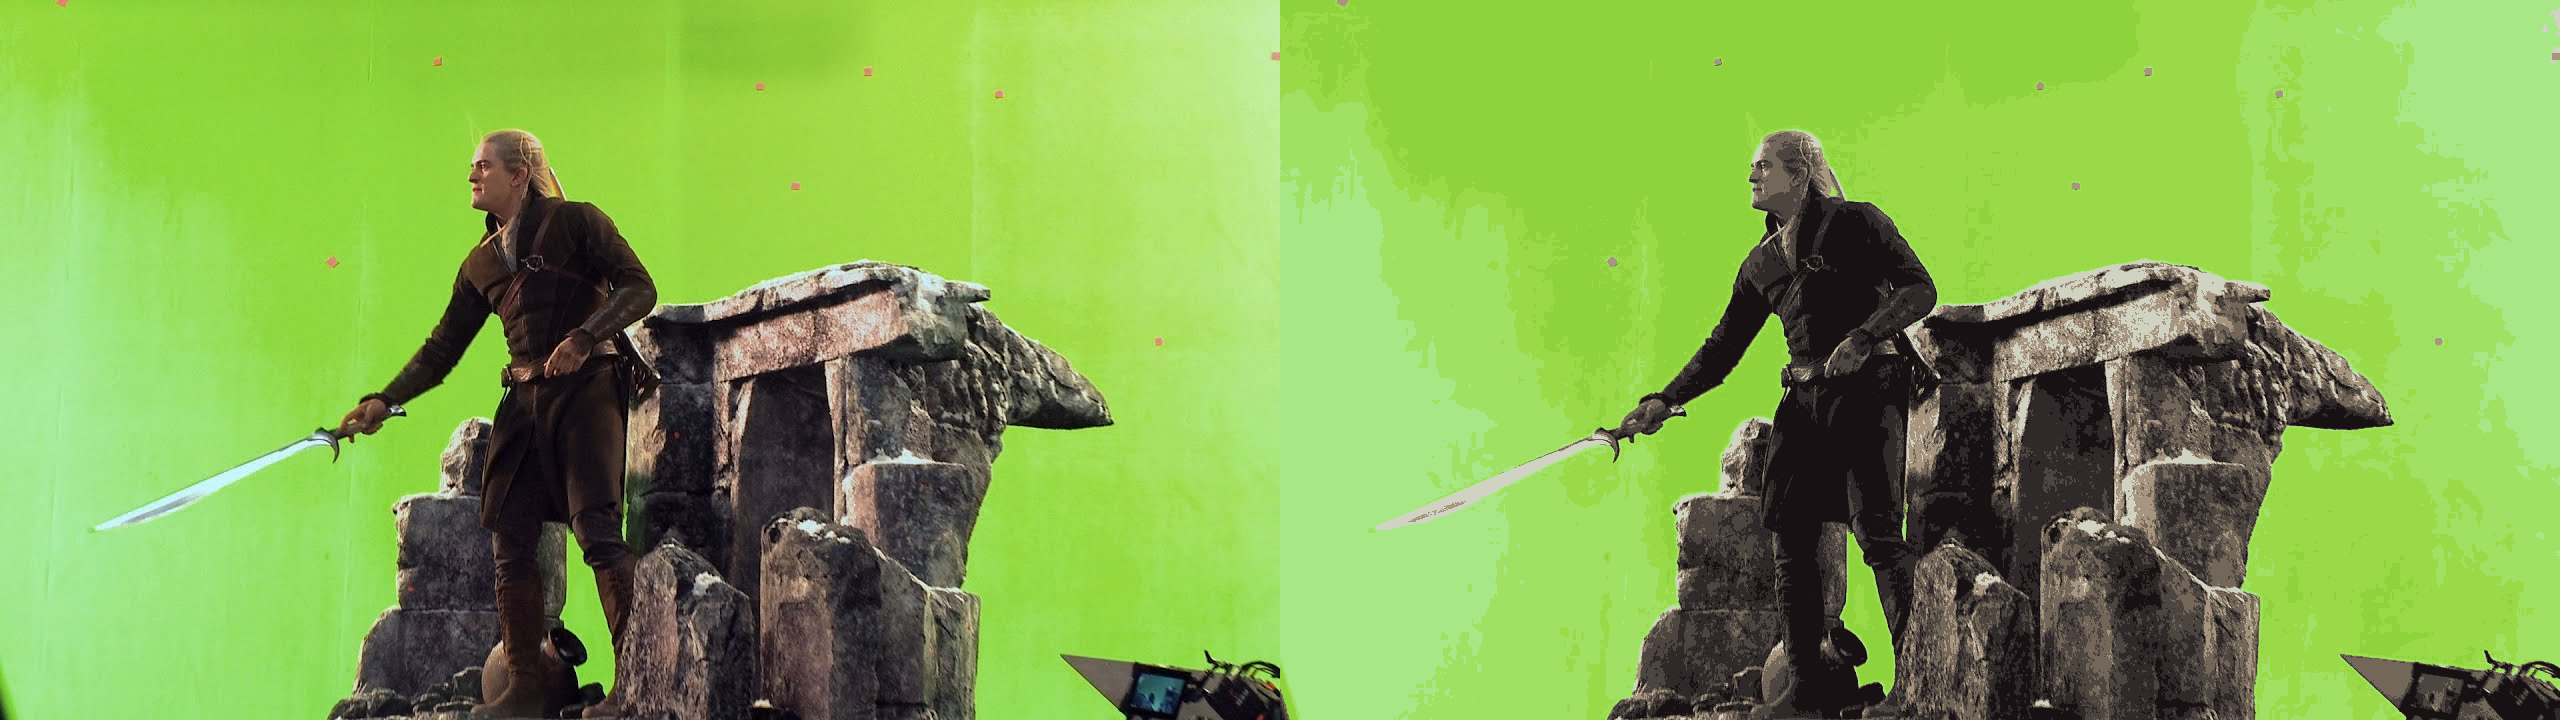

In [24]:
idx2_k10, c2_k10, d2_k10,_ = kmeans(img2.reshape(-1,3), k= 10, max_iter=50, r = 10)
img2_seg_k10 = (c2_k10[idx2_k10]).reshape(img2.shape)
res_img2_k10 = np.concatenate((img2, img2_seg_k10), axis=1)
cv2_imshow(res_img2_k10)